In [28]:
nat_1968= "/home/bernard/Documents/Workspaces/Teaching/Data-Science/Data/Births/natl1968.pub"
def head(n, input_filename, output_filename):
    with open(input_filename) as input_file, open(output_filename, 'w') as output_file:
        i=0
        for line in input_file:
            if i > n :
                break
            output_file.write(line)
            i += 1
head(10,nat_1968, "short-nat1968.pub")

In [29]:
lines=[]
with open("short-nat1968.pub") as f:
    for line in f:
        lines.append(line)
lines

['8020      1101020999900021111110199112020307110222000201214063232072111  01020112\n',
 '8010      1101001999900021111120199112525408110443000403414062892062111  01001112\n',
 '8010      1101001999900022222320199112020307130222000201213431985041111  01001222\n',
 '8010      2201026999900021111110199112323307110222000201214063289072111  01001112\n',
 '8010      1101001999900029922310199113434509131383001312834063742082111  01001222\n',
 '8010      1101002999900021111110199111919206110222000201214063374072111  01002112\n',
 '8010      1101002999900021111110199113232509110333000302314063941082111  01002112\n',
 '8010      1101002999900021111120199112121307110222000201214062807062111  01002112\n',
 '8010      1101002999900021111120199114040711110553000504514063147072111  01002112\n',
 '8010      1101002999900021111110199112323307110222000201214064111092111  01002112\n',
 '8010      1101002999900021111110199112323307110111000100114063175072111  01002112\n']

In [30]:
tmp=list(lines[0])
tmp[12:25]

['0', '1', '0', '2', '0', '9', '9', '9', '9', '0', '0', '0', '2']

In [31]:
states="""    Alabama - AL
    Alaska - AK
    Arizona - AZ
    Arkansas - AR
    California - CA
    Colorado - CO
    Connecticut - CT
    Delaware - DE
    District of Columbia - DC
    Florida - FL
    Georgia - GA
    Hawaii - HI
    Idaho - ID
    Illinois - IL
    Indiana - IN
    Iowa - IA
    Kansas - KS
    Kentucky - KY
    Louisiana - LA
    Maine - ME
    Maryland - MD
    Massachusetts - MA
    Michigan - MI
    Minnesota - MN
    Mississippi - MS
    Missouri - MO
    Montana - MT
    Nebraska - NE
    Nevada - NV
    New Hampshire - NH
    New Jersey - NJ
    New Mexico - NM
    New York - NY
    North Carolina - NC
    North Dakota - ND
    Ohio - OH
    Oklahoma - OK
    Oregon - OR
    Pennsylvania - PA
    Rhode Island - RI
    South Carolina - SC
    South Dakota - SD
    Tennessee - TN
    Texas - TX
    Utah - UT
    Vermont - VT
    Virginia - VA
    Washington - WA
    West Virginia - WV
    Wisconsin - WI
    Wyoming - WY
    Puerto Rico - PR
    Virgin Islands - VI
    Guam - GU
    Canada - CANADA
    Cuba - CUBA
    Mexico - MEXICO
    Western - WESTERN
    Other - OTHER"""
states_abbr=[]
for s in states.split("\n"):
    states_abbr.append(s.split(' ')[-1])
states_abbr[6]

'CT'

In [32]:
sex=['M','F']
attendents=['Hospital','Physician','Midwife','Other/NA']
def parse1968(line, res):
    if line[0] != '8':
        raise RuntimeError("Should be have started with an 8, but started with"+ line[0])
    res['year'].append(1968)
    res['resident'].append(line[10]=='1')
    res['resident_detail'].append(line[11])
    res['resident_state'].append(states_abbr[int(line[12:14])-1])
    res['sex'].append(sex[int(line[30])-1])
    res['month'].append(int(line[31:33]))
    res['age_mother'].append(int(line[37:39]))
    res['children_born_alive'].append(int(line[46:48]))
    res['attendent'].append(attendents[int(line[57])-1])
    tmp= int(line[58:60])
    res['premature'].append(tmp == 66) 
    if tmp <17 or tmp > 52 :
        tmp= 'NA'
    res['gestation_period'].append(tmp)
    tmp= int(line[61:65])
    if tmp < 227 or tmp > 8165:
        tmp= 'NA'
    res['weight_at_birth'].append(tmp)
    tmp= 'Legitimate' if line[68] == '1' else 'Illegitimate'
    tmp = tmp if line[68] == '2' else 'NA'
    res['legitimacy'].append(tmp)
    res['number_at_birth'].append(int(line[69]))
    res['birth_state'].append(states_abbr[int(line[73:75])-1])


In [33]:
res= {'year':[], 'resident':[], 'resident_detail':[], 'resident_state':[], 'sex':[], 'month':[], 'age_mother' : [], 'children_born_alive':[], 'attendent': [], 'premature':[]
      , 'gestation_period':[], 'weight_at_birth':[], 'legitimacy' :[], 'number_at_birth':[], 'birth_state':[]}
for line in lines:
    parse1968(line, res)
res

{'year': [1968, 1968, 1968, 1968, 1968, 1968, 1968, 1968, 1968, 1968, 1968],
 'resident': [True,
  True,
  True,
  False,
  True,
  True,
  True,
  True,
  True,
  True,
  True],
 'resident_detail': ['1', '1', '1', '2', '1', '1', '1', '1', '1', '1', '1'],
 'resident_state': ['AL',
  'AL',
  'AL',
  'AL',
  'AL',
  'AL',
  'AL',
  'AL',
  'AL',
  'AL',
  'AL'],
 'sex': ['M', 'F', 'F', 'M', 'M', 'M', 'M', 'F', 'F', 'M', 'M'],
 'month': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'age_mother': [20, 25, 20, 23, 34, 19, 32, 21, 40, 23, 23],
 'children_born_alive': [2, 4, 2, 2, 13, 2, 3, 2, 5, 2, 1],
 'attendent': ['Hospital',
  'Hospital',
  'Hospital',
  'Hospital',
  'Midwife',
  'Hospital',
  'Hospital',
  'Hospital',
  'Hospital',
  'Hospital',
  'Hospital'],
 'premature': [False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False],
 'gestation_period': [40, 40, 34, 40, 40, 40, 40, 40, 40, 40, 40],
 'weight_at_birth': [3232,
  2892,
  1985,
  3289,
  3742,


In [34]:
res= {'year':[], 'resident':[], 'resident_detail':[], 'resident_state':[], 'sex':[], 'month':[], 'age_mother' : [], 'children_born_alive':[], 'attendent': [], 'premature':[]
      , 'gestation_period':[], 'weight_at_birth' : [], 'legitimacy' :[], 'number_at_birth':[], 'birth_state':[]}
with open(nat_1968) as f:
    for line in f:
        parse1968(line, res)

In [35]:
res['weight_at_birth']

[3232,
 2892,
 1985,
 3289,
 3742,
 3374,
 3941,
 2807,
 3147,
 4111,
 3175,
 3856,
 3912,
 3657,
 3289,
 2608,
 4082,
 3260,
 4139,
 2523,
 2920,
 3119,
 3119,
 4111,
 2920,
 3487,
 3430,
 2750,
 3005,
 3289,
 3033,
 3289,
 3204,
 2410,
 3147,
 2495,
 2438,
 4082,
 2807,
 2693,
 4111,
 2948,
 4536,
 2268,
 3487,
 1503,
 3884,
 3544,
 3175,
 2892,
 3402,
 3856,
 3232,
 2863,
 3430,
 2722,
 3232,
 3317,
 3742,
 2353,
 3629,
 3515,
 3402,
 3402,
 3402,
 2863,
 2863,
 4139,
 3119,
 3317,
 3119,
 3430,
 3600,
 3345,
 3629,
 3856,
 3033,
 3856,
 2977,
 2296,
 2722,
 3742,
 3232,
 3402,
 2977,
 2268,
 3204,
 2892,
 3856,
 3374,
 2807,
 3345,
 4281,
 3345,
 1446,
 3771,
 2835,
 3147,
 3175,
 1956,
 2637,
 2920,
 3515,
 3317,
 2807,
 2807,
 3204,
 3402,
 3147,
 3317,
 2410,
 2750,
 2750,
 3487,
 3402,
 3487,
 4139,
 2325,
 3544,
 2807,
 3033,
 3175,
 3487,
 3544,
 3686,
 2523,
 3232,
 3345,
 4224,
 3033,
 3260,
 3317,
 3600,
 3090,
 4111,
 3600,
 4167,
 4621,
 3544,
 2722,
 3033,
 3884,
 3175,

In [36]:
def parse1969_1971(line, res):
    if line[0] !='9' and line[0] != '0' and line[0] != '1':
        raise RuntimeError("Should be have started with an 9, 0 or 1, but started with"+line[0])
    tmp= int(line[0])
    year= 1969 if tmp > 1 else 1970+tmp
    res['year'].append(year)
    res['resident'].append(line[10]=='1')
    res['resident_detail'].append(line[11])
    tmp= int(line[12:14])
    res['resident_state'].append(states_abbr[tmp-1] if tmp <= 59 else 'NA' )
    res['birth_state'].append(states_abbr[int(line[27:29])-1])
    res['sex'].append(sex[int(line[34])-1])
    res['age_mother'].append(int(line[40:42]))
    res['children_born_alive'].append(int(line[60:62])) #int(line[51:53])+int(line[53:55])) #boen alive now living + born alive now dead
    tmp= int(line[68:70])
    res['age_father'].append(tmp if tmp != 99 else 'NA')
    res['attendent'].append(attendents[int(line[35])-1])
    tmp= int(line[72:76])
    res['weight_at_birth'].append(tmp if tmp >= 227 and tmp <= 8165 else 'NA')
    res['number_at_birth'].append(int(line[80]) if year == 1971 else 'NA')
    res['month'].append(int(line[83:85]))
    tmp= int(line[85:87])
    res['day_of_month'].append(tmp if tmp <= 31 else 'NA' )
    tmp= int(line[92:94])
    if tmp <17 or tmp > 52 :
        tmp= 'NA'
    res['gestation_period'].append(tmp)
    tmp= int(line[99:101])
    if tmp == 1:
        tmp= 2 # data does not distinguish between 0-5 years
    else:
        tmp = 'NA' if tmp == 0 or tmp > 13 else tmp + 4
    res['mother_education'].append(tmp)
    tmp= int(line[104:106])
    if tmp == 1:
        tmp= 2 # data does not distinguish between 0-5 years
    else:
        tmp = 'NA' if tmp == 0 or tmp > 13 else tmp + 4
    res['father_education'].append(tmp)
    tmp= 'Legitimate' if line[106] == '1' else 'Illegitimate'
    tmp = tmp if line[106] == '2' else 'NA'
    res['legitimacy'].append(tmp)
    tmp= int(line[116:119])
    res['birth_interval'].append(tmp if tmp <= 500 else 'NA')
    tmp= int(line[136:139])
    tmp= states_abbr[tmp-1] if year >= 1970 and tmp <= 59 else 'NA'
    res['mother_place_of_birth'].append(tmp)

In [37]:
res_1969={'year':[], 'resident':[], 'resident_detail':[], 'resident_state':[], 'birth_state':[], 'sex':[], 'age_mother':[], 'children_born_alive':[], 'age_father':[], 'attendent':[], 'weight_at_birth':[],
         'number_at_birth':[], 'month':[], 'day_of_month':[], 'gestation_period':[], 'mother_education':[], 'father_education':[], 'legitimacy':[], 'birth_interval':[], 'mother_place_of_birth':[]}
nat_1969= "/home/bernard/Documents/Workspaces/Teaching/Data-Science/Data/Births/NATL1969.PUB"
with open(nat_1969,encoding="ISO-8859-1") as f:
    for line in f:
        parse1969_1971(line, res_1969)

In [38]:
res_1969['weight_at_birth']

[3629,
 3544,
 1985,
 3459,
 2495,
 3856,
 4309,
 4082,
 3402,
 4479,
 3572,
 3204,
 3657,
 3771,
 3629,
 2863,
 3289,
 2722,
 3289,
 3827,
 3515,
 1758,
 4253,
 3260,
 3345,
 3402,
 3260,
 4281,
 3544,
 2523,
 3572,
 3289,
 2381,
 3572,
 3402,
 2807,
 4082,
 3402,
 3771,
 4026,
 2693,
 2495,
 2722,
 3629,
 2722,
 2466,
 3629,
 2523,
 3430,
 4082,
 2778,
 3856,
 3317,
 2750,
 3175,
 3544,
 3090,
 3799,
 2948,
 3175,
 3912,
 3742,
 3572,
 3317,
 3175,
 3515,
 3062,
 3544,
 3147,
 3827,
 3544,
 3487,
 2608,
 4196,
 2807,
 2438,
 3827,
 3629,
 3657,
 4196,
 2580,
 3062,
 3771,
 2523,
 3515,
 3090,
 3090,
 2807,
 3175,
 3260,
 3459,
 3260,
 3515,
 4111,
 3799,
 3175,
 3686,
 3402,
 3204,
 2778,
 3090,
 3941,
 3686,
 3119,
 3147,
 3487,
 3912,
 3289,
 3119,
 4026,
 2523,
 3884,
 3657,
 3119,
 3487,
 3941,
 3827,
 3572,
 3345,
 3175,
 3090,
 3827,
 3799,
 2041,
 3119,
 2948,
 3033,
 3686,
 3430,
 3374,
 3430,
 2807,
 3090,
 1673,
 2835,
 2495,
 1588,
 'NA',
 3629,
 2948,
 3175,
 4139,
 3345,

In [39]:
nat_1970= "/home/bernard/Documents/Workspaces/Teaching/Data-Science/Data/Births/NATL70.PUB"
with open(nat_1970,encoding="ISO-8859-1") as f:
    for line in f:
        parse1969_1971(line, res_1969)

In [40]:
nat_1971= "/home/bernard/Documents/Workspaces/Teaching/Data-Science/Data/Births/Natl1971.pub"
with open(nat_1971,encoding="ISO-8859-1") as f:
    for line in f:
        parse1969_1971(line, res_1969)

In [41]:
len(res_1969['weight_at_birth'])

5450777

In [42]:
%matplotlib inline
import numpy as np
import statistics
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df_1969 = pd.DataFrame.from_dict(res_1969).astype({'year': int, 'weight_at_birth':int}, errors='ignore')

In [44]:
df_1969['weight_at_birth']=pd.to_numeric(df_1969['weight_at_birth'], errors='coerce')

In [45]:
matplotlib.rcParams['figure.figsize'] = [16, 16]

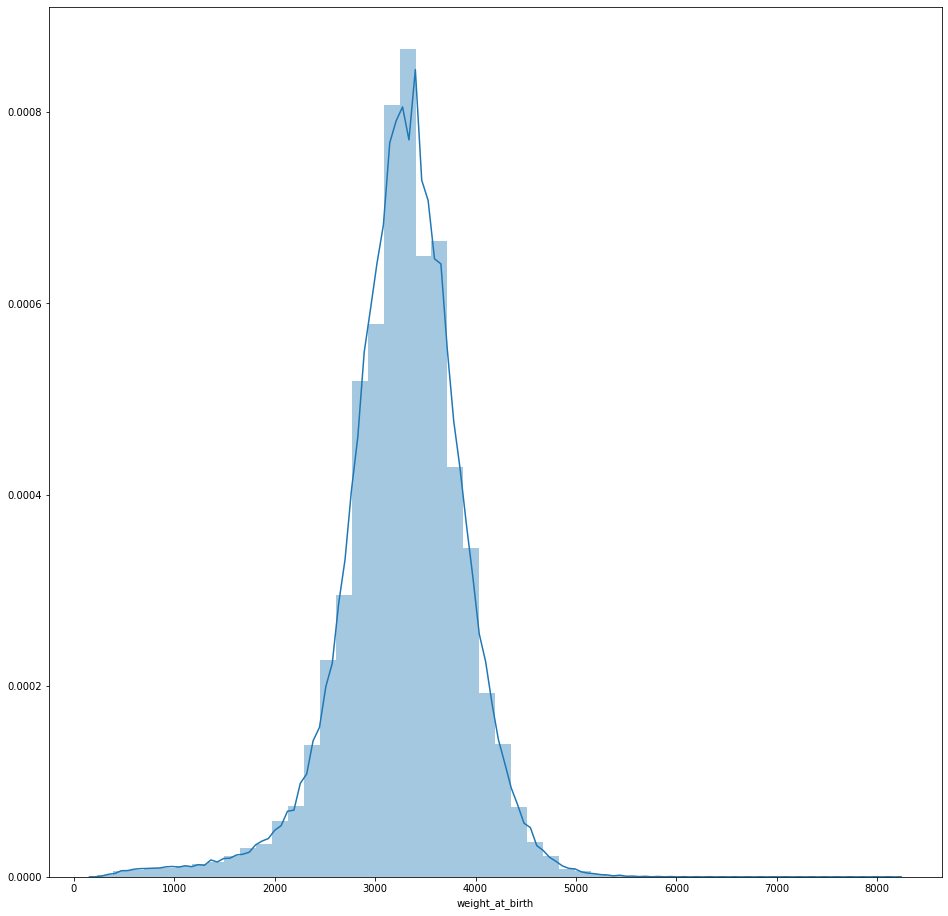

In [46]:
import seaborn as sns
sns.distplot(df_1969['weight_at_birth'].dropna())

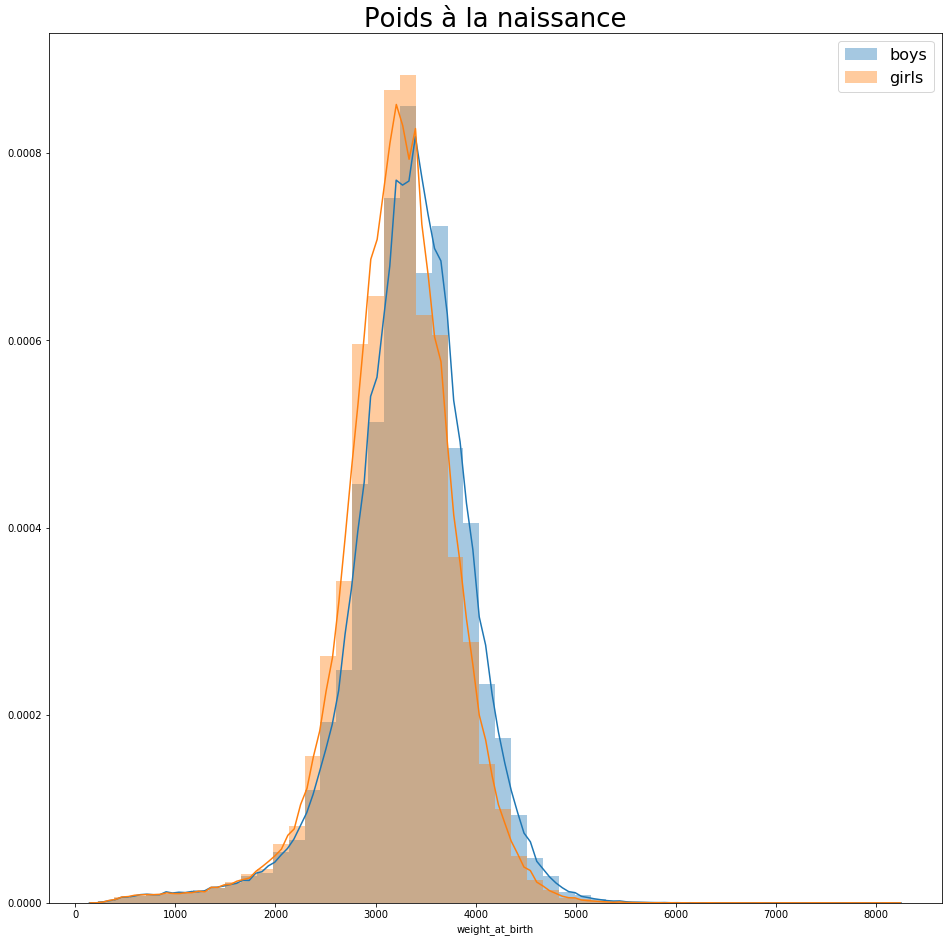

In [47]:
boys=df_1969.loc[df_1969['sex']=='M']
girls=df_1969.loc[df_1969['sex']=='F']
bg=sns.distplot(boys['weight_at_birth'].dropna(), label="boys")
gg=sns.distplot(girls['weight_at_birth'].dropna(), label="girls")
plt.title("Poids à la naissance", fontsize= 26)
plt.legend(prop={'size':16})

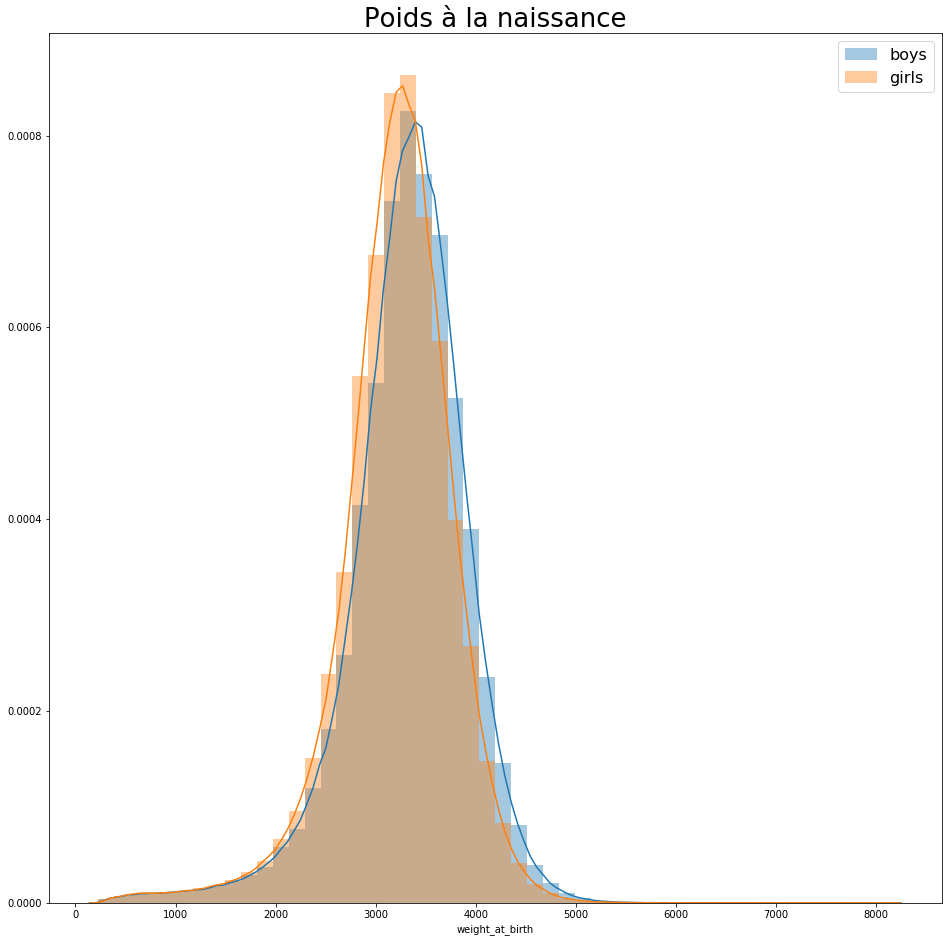

In [48]:
df_2018['weight_at_birth']=pd.to_numeric(df_2018['weight_at_birth'], downcast='integer', errors='coerce')
boys=df_2018.loc[df_2018['sex']=='M']
girls=df_2018.loc[df_2018['sex']=='F']
bg=sns.distplot(boys['weight_at_birth'].dropna(), label="boys")
gg=sns.distplot(girls['weight_at_birth'].dropna(), label="girls")
plt.title("Poids à la naissance", fontsize= 26)
plt.legend(prop={'size':16})

TypeError: unsupported operand type(s) for +: 'int' and 'str'

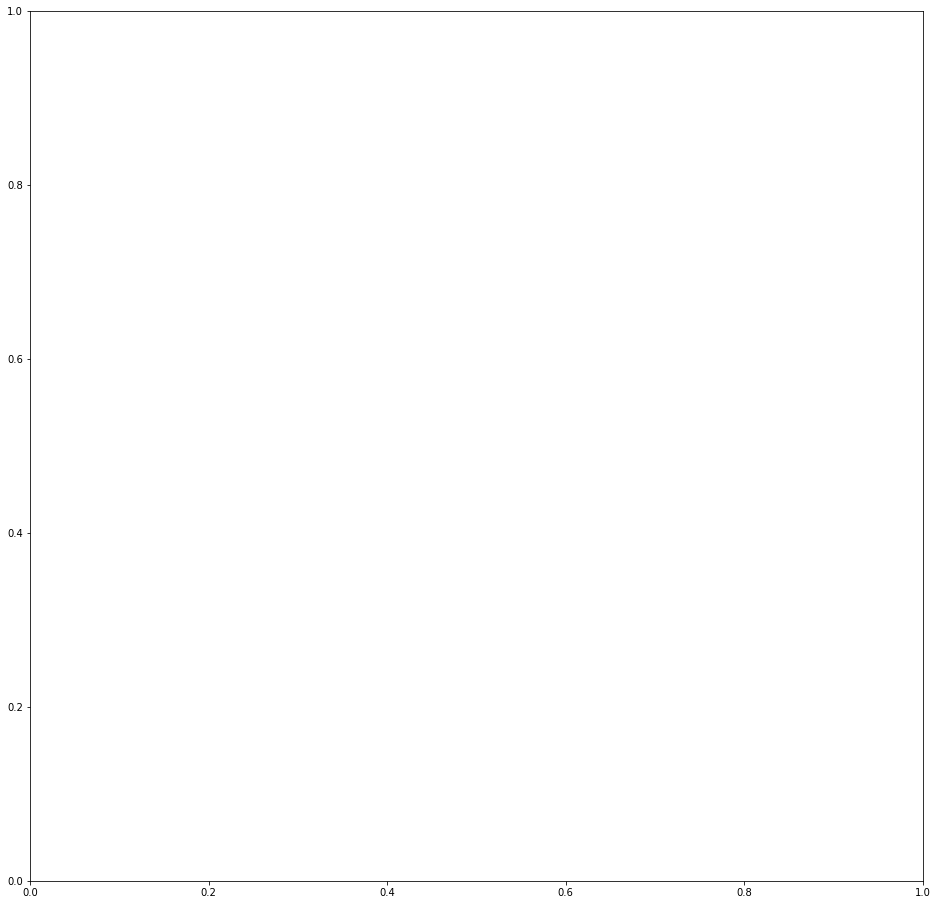

In [49]:
df_2018['cigarettes_before']=pd.to_numeric(df_2018['cigarettes_before'], downcast='integer', errors='coerce')
smokers=df_2018.loc[df_2018['cigarettes_before']>0]
df_2018['cigarettes_trim_1']=pd.to_numeric(df_2018['cigarettes_trim_1'], downcast='integer', errors='coerce')
df_2018['cigarettes_trim_2']=pd.to_numeric(df_2018['cigarettes_trim_2'], downcast='integer', errors='coerce')
df_2018['cigarettes_trim_3']=pd.to_numeric(df_2018['cigarettes_trim_3'], downcast='integer', errors='coerce')
s1=sns.distplot(smokers['cigarettes_trim_1'].dropna(), kde=False, label="cigarettes pendant le premier trimestre")
s2=sns.distplot(smokers['cigarettes_trim_2'].dropna(),kde=False, label="cigarettes pendant le deuxième trimestre")
s3=sns.distplot(smokers['cigarettes_trim_3'].dropna(), kde=False, label="cigarettes pendant le troisième trimestre")

plt.title("Tabagisme des femmes qui fumaient avant leur grossesse", fontsize= 26)
plt.legend(prop={'size':16})

In [ ]:
sns.jointplot(x="cigarettes_trim_1", y="weight_at_birth", data=smokers, kind='reg', stat_func=pearsonr, height=16);

In [ ]:
df_2018['mother_height']=pd.to_numeric(df_2018['mother_height'], downcast='integer', errors='coerce')
df_2018['mother_bmi']=pd.to_numeric(df_2018['mother_bmi'], errors='coerce')
sns.jointplot(x="mother_height", y="weight_at_birth", data=df_2018, kind='reg',  height=16);

In [ ]:
sns.jointplot(x="mother_height", y="weight_at_birth", data=df_2018, kind='kde',  height=16);

In [ ]:
sns.jointplot(x="mother_bmi", y="weight_at_birth", data=df_2018, kind='reg',  height=16);

In [ ]:
# BMI = W/ H²
df_2018['weight_mother']= df_2018['mother_bmi']*(df_2018['mother_height']*0.0254)**2

In [ ]:
np.mean(df_2018['weight_mother'])

In [ ]:
%%time
sns.jointplot(x="weight_mother", y="weight_at_birth", data=df_2018, kind='reg',  height=16);

In [ ]:
%%time
#g=sns.jointplot(x="weight_mother", y="weight_at_birth", data=df_2018, kind='reg', scatter = False, stat_func=pearsonr,  height=16);
g= sns.scatterplot(x="weight_mother", y="weight_at_birth", hue= 'delivery', data=df_2018)

In [ ]:
plt.figure(figsize=(8,4))
g= sns.barplot(, is_dup.values, alpha=0.8, color=color[1])
#g.set_xlabel('Category')
#g.set_ylabel('Number of Occurrences')
#ax.set_xticklabels(label_text['labels'], rotation='vertical', fontsize=10)

In [ ]:
cesareans=df_2018.loc[df_2018['delivery']=='Cesarean']
sns.jointplot(x="weight_mother", y="weight_at_birth", data=cesareans, kind='reg',  height=16);

In [ ]:
sns.set(style="darkgrid")
ax= sns.countplot(x = 'delivery',
              data = df_2018,
              order = df_2018['delivery'].value_counts().index)
total = float(len(df_2018)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(100*height/total),
            ha="center") 

In [ ]:
df_2018.columns

In [ ]:
df_2018['weight_at_birth']

In [ ]:
%%time
#df = df.reset_index()
#df['index'] = classes[:]

g = sns.jointplot(x='weight_mother', y='weight_at_birth', data=df_2018, kind='reg', scatter = False, height=16 )
group_names=[]
g1=None
g2=None
g3= None
for i, subdata in df_2018.groupby('delivery'):
    #print(subdata.columns)
    group_names.append(i)
    g1=sns.kdeplot(subdata['weight_mother'], ax=g.ax_marg_x, legend=False)
    g2=sns.kdeplot(subdata['weight_at_birth'], ax=g.ax_marg_y, vertical=True, legend=False)
    g3=g.ax_joint.plot(subdata['weight_mother'], subdata['weight_at_birth'], "+",alpha=0.1, ms = 8, )
#plt.tight_layout()
new_title = 'My title'
try:
    g1._legend.set_title(new_title)
    # replace labels
    for t, label in zip(g1._legend.texts, group_names): t.set_text(label)
except AttributeError:
    pass
try:
    g2._legend.set_title(new_title)
    # replace labels
    for t, label in zip(g2._legend.texts, group_names): t.set_text(label)
except AttributeError:
    pass
try:
    g3._legend.set_title(new_title)
    # replace labels
    for t, label in zip(g3._legend.texts, group_names): t.set_text(label)
except AttributeError:
    pass


In [ ]:
small_df2018= df_2018.sample(frac =.1)


In [ ]:
sns.catplot(x="birth_place", y="weight_at_birth", kind="box", data=small_df2018, height=16);

In [ ]:
sns.set(style="darkgrid")
ax= sns.countplot(x = 'birth_place',
              data = df_2018,
              order = df_2018['birth_place'].value_counts().index)
total = float(len(df_2018)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(100*height/total),
            ha="center") 

In [ ]:
sns.set(style="darkgrid")
ax= sns.countplot(x = 'birth_place',
              data = df_2018.loc[df_2018['birth_place']!='Hospital'],
              order = df_2018.loc[df_2018['birth_place']!='Hospital']['birth_place'].value_counts().index)
total = float(len(df_2018.loc[df_2018['birth_place']!='Hospital'])) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(100*height/total),
            ha="center") 

In [ ]:
df_1969['age_mother']=pd.to_numeric(df_1969['age_mother'], downcast='integer', errors='coerce')
df_1969['age_father']=pd.to_numeric(df_1969['age_father'], downcast='integer',errors='coerce')
sns.distplot(df_1969['age_father'].dropna(), kde = False, bins=range(100))
sns.distplot(df_1969['age_mother'].dropna(), kde = False, bins= range(100))

In [ ]:
from scipy.stats import pearsonr
sns.jointplot(x="age_father", y="age_mother", data=df_1969, alpha = 0.1, stat_func=pearsonr, height=16);

In [ ]:
with sns.axes_style("white"):
    sns.jointplot(x="age_father", y="age_mother", data=df_1969, kind="hex", color="k");

In [ ]:
df_1969['mother_education']=pd.to_numeric(df_1969['mother_education'], downcast='integer', errors='coerce')
df_1969['father_education']=pd.to_numeric(df_1969['father_education'], downcast='integer', errors='coerce')
sns.distplot(df_1969['father_education'].dropna(), kde = False, bins= 100)
sns.distplot(df_1969['mother_education'].dropna(), kde = False, bins= 100)

In [ ]:
sns.jointplot(x="father_education", y="mother_education", data=df_1969, kind="hex", height=16);

In [ ]:
birth_places=["Hospital", "Birth Center", "Home (intended)", "Home (unintended)", "Clinic/Doctor's Office", "Other", "NA"]
fetal_presentations=["Cephalic", "Breech", "Other", "NA"]
deliveries=["Spontaneous", "Forceps", "Vacuum", "Cesarean", "NA"]
def parse2018(line, res):
    if line[8:12] !='2018':
        raise RuntimeError("Should have started with 2018 but started with"+line[8:12])
    year= int(line[8:12])
    res['year'].append(year)
    res['month'].append(int(line[12:14]))
    tmp= int(line[18:22])
    res['time'].append(tmp if tmp != 9999 else 'NA')# 0000->2359
    res['day_of_week'].append(int(line[22]))
    res['birth_place'].append(birth_places[int(line[31])-1] if line[31] != '9' else 'NA')
    res['age_mother'].append(int(line[74:76]))
    res['marital_status'].append('Married' if line[119]=='1' else 'Unmarried')
    res['mother_education'].append(int(line[123]))
    tmp= int(line[146:148])
    res['age_father'].append(tmp if tmp != 99 else 'NA')
    res['father_education'].append(int(line[162]))
    tmp= int(line[181])
    res['total_birth_order'].append(tmp if tmp != 9 else 'NA')
    tmp= int(line[197:200])
    res['interval_since_last_live_birth'].append(tmp if tmp >=4 and tmp <=300 else 'NA')
    tmp= int(line[252:254])
    res['cigarettes_before'].append(tmp if tmp != 99 else 'NA')
    tmp= int(line[254:256])
    res['cigarettes_trim_1'].append(tmp if tmp != 99 else 'NA')
    tmp= int(line[256:258])
    res['cigarettes_trim_2'].append(tmp if tmp != 99 else 'NA')
    tmp= int(line[258:260])
    res['cigarettes_trim_3'].append(tmp if tmp != 99 else 'NA')
    tmp= int(line[279:281])
    res['mother_height'].append(tmp if tmp != 99 else 'NA')
    res['mother_bmi'].append(float(line[282:286]) if line[282:286] != '99.9' else 'NA')
    res['anesthesia'].append(line[387])
    tmp= int(line[400])
    res['fetal_presentation'].append(fetal_presentations[tmp-1] if tmp != 9 else 'NA')
    res['delivery'].append(deliveries[int(line[401])-1] if line[401] != '9' else 'NA')
    res['intensive_care'].append(line[418])
    res['number_at_birth'].append(int(line[453]))
    res['sex'].append(line[474])
    tmp= int(line[489:491])
    res['gestation_period'].append(tmp if tmp != 99 else 'NA')
    tmp= int(line[503:507])
    res['weight_at_birth'].append(tmp if tmp >= 227 and tmp <= 8165 else 'NA')


In [ ]:
sns.distplot(df_2018['mother_bmi'].dropna())

In [ ]:
res_2018={'year':[], 'month':[], 'time':[], 'day_of_week':[], 'birth_place':[], 'age_mother':[], 'marital_status':[], 'mother_education':[],
          'age_father':[], 'father_education':[], 'total_birth_order':[], 'interval_since_last_live_birth':[], 
         'cigarettes_before':[], 'cigarettes_trim_1':[], 'cigarettes_trim_2':[], 'cigarettes_trim_3':[], 'mother_height' : [], 'mother_bmi':[]
         ,'anesthesia':[], 'fetal_presentation':[], 'delivery':[], 'intensive_care':[], 'number_at_birth':[], 'sex':[], 'gestation_period':[],
         'weight_at_birth': []#, 'residence_city_pop':[]
         }
nat_2018="/home/bernard/Documents/Workspaces/Teaching/Data-Science/Data/Births/Nat2018PublicUS.c20190509.r20190717.txt"
with open(nat_2018) as f:
    for line in f:
        parse2018(line, res_2018)

In [ ]:
for k in res_2018.keys():
    print("%s : %d"%(k,len(res_2018[k])))

In [ ]:
df_2018 = pd.DataFrame.from_dict(res_2018)
df_2018['age_mother']=pd.to_numeric(df_2018['age_mother'], downcast='integer', errors='coerce')
df_2018['age_father']=pd.to_numeric(df_2018['age_father'], downcast='integer', errors='coerce')
sns.distplot(df_2018['age_father'].dropna(), kde = False, bins= 100)
sns.distplot(df_2018['age_mother'].dropna(), kde = False, bins= 100)

In [ ]:
sns.kdeplot(df_2018['age_father'].dropna(), bw=1, label="pères en 2018")
sns.kdeplot(df_2018['age_mother'].dropna(),bw=1, label= "mères en 2018")
sns.kdeplot(df_1969['age_father'].dropna(), bw=1, label="pères en 1969-1971")
sns.kdeplot(df_1969['age_mother'].dropna(), bw=1, label="mères en 1969-1971")

In [ ]:
np.median(df_1969['age_mother'].dropna())

In [ ]:
days_of_week=["Unused","Dimanche", "Lundi", "Mardi", "Mercredi", "Jeudi", "Vendredi", "Samedi"]# 1 -> dimanche
g=sns.distplot(df_2018['day_of_week'].dropna(), kde = False)
g.set_xticklabels(days_of_week, rotation='horizontal', fontsize=20)